<a href="https://colab.research.google.com/github/vjbarayuga/Week8-Boosting_Models/blob/main/census_income_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from itertools import cycle, islice
%matplotlib inline

In [4]:
# open filename
df = pd.read_csv('/content/drive/MyDrive/Coding_DOJO-Data_Science_Bootcamp/04_Classification_Models/DATASET/census_income - census_income.csv')
df.head()

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income-class    32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [10]:
# rename columns
df.columns = ['census-id', 'age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss','hours-per-week', 'native-country', 'income-class' ]

In [11]:
# get column names
column_names = df.columns

In [12]:
# for each attributes (columns), print value counts
for column_name in  column_names:
    print(df[column_name].value_counts())

2047     1
32069    1
5416     1
7465     1
1322     1
        ..
15026    1
12979    1
2740     1
693      1
0        1
Name: census-id, Length: 32561, dtype: int64
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-marri

In [13]:
# distribution of the classes
df['income-class'].value_counts()

<=50K    24720
>50K      7841
Name: income-class, dtype: int64

In [14]:
df.columns

Index(['census-id', 'age', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income-class'],
      dtype='object')

In [15]:
df.shape

(32561, 14)

In [16]:
df.describe()

,census-id,age,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,16280.000000,38.581647,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,7385.292085,402.960219,12.347429
min,0.000000,17.000000,0.000000,0.000000,1.000000
25%,8140.000000,28.000000,0.000000,0.000000,40.000000
50%,16280.000000,37.000000,0.000000,0.000000,40.000000
75%,24420.000000,48.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,99999.000000,4356.000000,99.000000


In [17]:
df.isin(['?']).sum()

census-id            0
age                  0
workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income-class         0
dtype: int64

In [18]:
df = df.replace('?', np.NaN)

In [19]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [20]:
df.isnull().sum()

census-id         0
age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income-class      0
dtype: int64

In [21]:
df.head()

,census-id,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
df['income-class'].value_counts()

<=50K    24720
>50K      7841
Name: income-class, dtype: int64

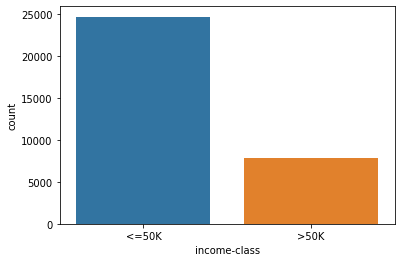

In [23]:
sns.countplot(x='income-class', data = df)

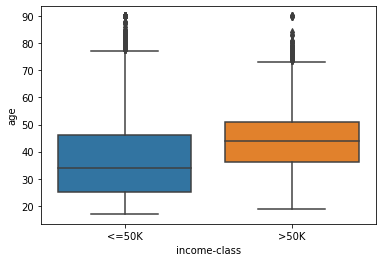

In [24]:
sns.boxplot(y='age',x='income-class',data=df)

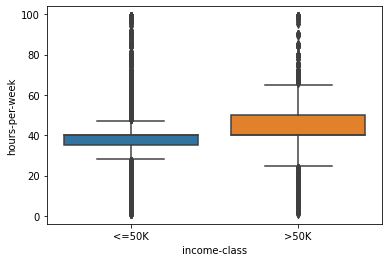

In [25]:
sns.boxplot(y='hours-per-week',x='income-class',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


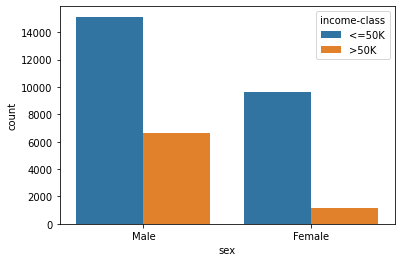

In [26]:
sns.countplot(df['sex'],hue=df['income-class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

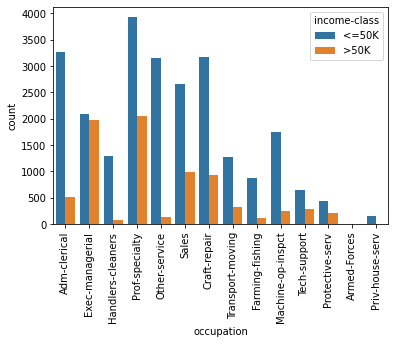

In [27]:
sns.countplot(df['occupation'],hue=df['income-class'])
plt.xticks(rotation=90)

In [28]:
df['income-class']=df['income-class'].map({'<=50K': 0, '>50K': 1})

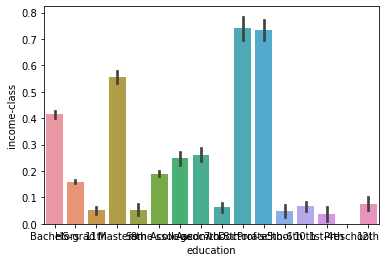

In [29]:
sns.barplot(x="education",y="income-class",data=df)

In [30]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

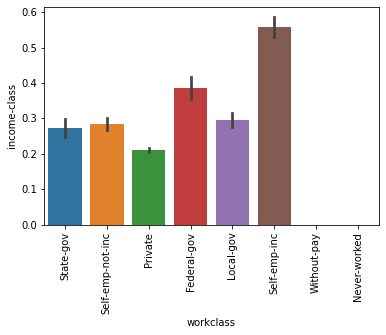

In [31]:
sns.barplot(x="workclass",y="income-class",data=df)
plt.xticks(rotation=90)

In [32]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

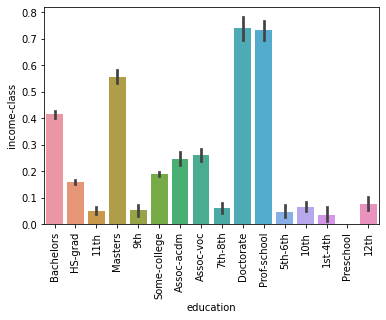

In [33]:
sns.barplot(x="education",y="income-class",data=df)
plt.xticks(rotation=90)

In [34]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

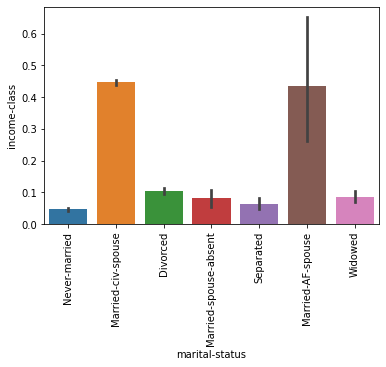

In [35]:
sns.barplot(x="marital-status",y="income-class",data=df)
plt.xticks(rotation=90)

In [36]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

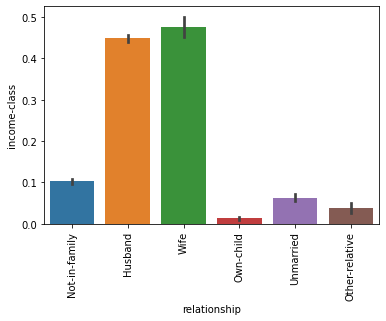

In [37]:
sns.barplot(x="relationship",y="income-class",data=df)
plt.xticks(rotation=90)

In [38]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [39]:
df.dtypes

census-id          int64
age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income-class       int64
dtype: object

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [42]:
df.dtypes

census-id         int64
age               int64
workclass         int64
education         int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
income-class      int64
dtype: object

In [43]:
df.head()

,census-id,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,0,39,6,9,4,0,1,4,1,2174,0,40,38,0
1,1,50,5,9,2,3,0,4,1,0,0,13,38,0
2,2,38,3,11,0,5,1,4,1,0,0,40,38,0
3,3,53,3,1,2,5,0,2,1,0,0,40,38,0
4,4,28,3,9,2,9,5,2,0,0,0,40,4,0


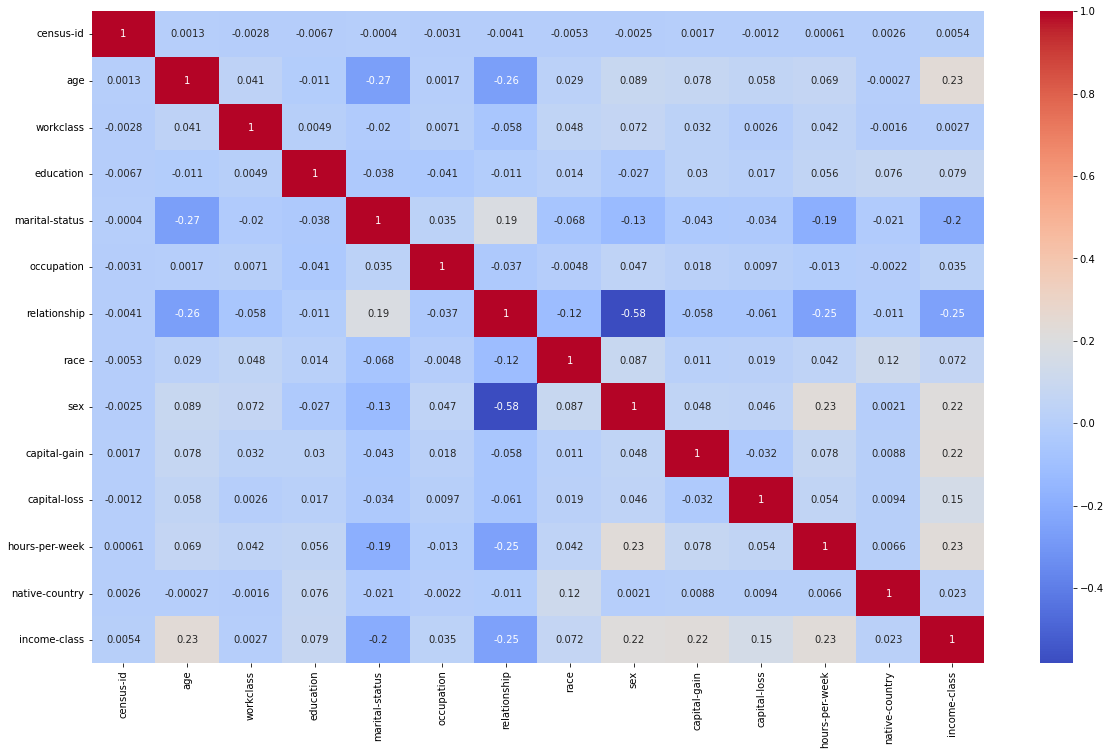

In [44]:
corrmat = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [45]:
corrmat['income-class'].sort_values(ascending = False)

income-class      1.000000
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
sex               0.215980
capital-loss      0.150526
education         0.079317
race              0.071846
occupation        0.034625
native-country    0.023058
census-id         0.005404
workclass         0.002693
marital-status   -0.199307
relationship     -0.250918
Name: income-class, dtype: float64

In [46]:
df.head()

,census-id,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,0,39,6,9,4,0,1,4,1,2174,0,40,38,0
1,1,50,5,9,2,3,0,4,1,0,0,13,38,0
2,2,38,3,11,0,5,1,4,1,0,0,40,38,0
3,3,53,3,1,2,5,0,2,1,0,0,40,38,0
4,4,28,3,9,2,9,5,2,0,0,0,40,4,0


In [47]:
#X = df.iloc[:,0:-1]
#y = df.iloc[:,-1]

X = df.drop(columns = 'income-class')
y = df['income-class']

In [48]:
X

,census-id,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,39,6,9,4,0,1,4,1,2174,0,40,38
1,1,50,5,9,2,3,0,4,1,0,0,13,38
2,2,38,3,11,0,5,1,4,1,0,0,40,38
3,3,53,3,1,2,5,0,2,1,0,0,40,38
4,4,28,3,9,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,3,7,2,12,5,4,0,0,0,38,38
32557,32557,40,3,11,2,6,0,4,1,0,0,40,38
32558,32558,58,3,11,6,0,4,4,0,0,0,40,38
32559,32559,22,3,11,4,0,3,4,1,0,0,20,38


In [49]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income-class, Length: 32561, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify=y)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [54]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.832716,0.323996,1.712776,-2.390441,-0.406038,-0.293139,-0.900902,0.392245,0.705339,-0.146047,-0.215155,1.572934,0.262439
1,-0.792684,-1.510030,-0.083873,1.216932,0.917251,0.716415,0.972865,0.392245,-1.417758,-0.146047,3.775441,-1.648494,0.262439
2,-0.070047,-0.336253,-0.083873,1.216932,0.917251,0.211638,-0.276313,0.392245,-1.417758,-0.146047,-0.215155,-0.037780,0.262439
3,-0.707686,-1.583391,-0.083873,-2.648111,0.917251,1.221193,1.597453,0.392245,-1.417758,-0.146047,-0.215155,-2.292780,0.262439
4,-0.943162,0.177274,-0.083873,1.216932,-1.729327,0.211638,-0.276313,0.392245,-1.417758,-0.146047,-0.215155,-0.359923,0.262439


In [55]:
y_train.head()

24029    0
8788     0
15564    0
9585     0
7377     1
Name: income-class, dtype: int64

## Logistic Regression

In [56]:
l=[]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:', acc * 100)
l.append(acc)

Logistic Regression: 80.40741119868974


## KNeighbors Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Knn:',acc * 100)
l.append(acc)

Knn: 81.7176783703552


## Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Random Forest:',acc * 100)
l.append(acc)
print(cm(y_test, y_pred))
print(cr(y_test, y_pred))

Random Forest: 85.90439144231755
[[6918  499]
 [ 878 1474]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7417
           1       0.75      0.63      0.68      2352

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.85      0.86      0.85      9769



In [ ]:
# Random Forest Performed well against the other classifier models

## XGB Classifier

In [71]:
from xgboost import XGBClassifier

model = XGBClassifier()

In [66]:
# train model using normalized features
model.fit(X_train, y_train)

XGBClassifier()

In [78]:
# check performance of model trained using normalized values

print('Training accuracy:', model.score(X_train, y_train))
print('Testing accuracy:', model.score(X_test,y_test))

Training accuracy: 0.8884696384696384
Testing accuracy: 0.8730678677449074


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


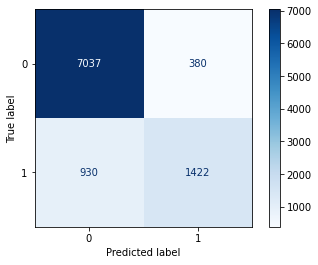

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = 'Blues');

## Light GBM

In [79]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

In [80]:
# train model using normalized features
model.fit(X_train, y_train)

LGBMClassifier()

In [81]:
# check performance of model trained using normalized values

print('Training accuracy:', model.score(X_train, y_train))
print('Testing accuracy:', model.score(X_test,y_test))

Training accuracy: 0.8884696384696384
Testing accuracy: 0.8730678677449074


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


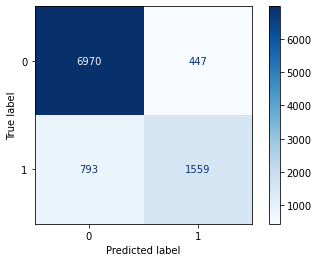

In [82]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = 'Blues');

## Gradient Boosting Classifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

In [84]:
# train model using normalized features
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [85]:
# check performance of model trained using normalized values

print('Training accuracy:', model.score(X_train, y_train))
print('Testing accuracy:', model.score(X_test,y_test))

Training accuracy: 0.8687258687258688
Testing accuracy: 0.8684614597195209


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


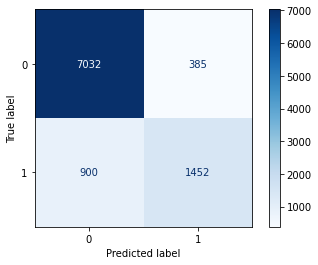

In [86]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = 'Blues');